In [29]:
import skimage
import numpy as np
import os 
import pandas as pd
import torch
from pathlib import Path
import matplotlib.pyplot as plt

Check if images treated in the same way have a similar phenotype

In [69]:
metadata_cpg0000 = pd.read_csv("/lustre/groups/ml01/datasets/projects/cpg0000_alessandro/metadata/metadata_large.csv",
                              index_col=0)
metadata_cpg0000_trt = metadata_cpg0000.loc[metadata_cpg0000.STATE=="trt"]

In [31]:
metadata_cpg0000_trt

,SAMPLE_KEY,PLATE,WELL,PERT_TYPE,CPD_NAME,STATE,ANNOT,GENE,SEQUENCE,SPLIT
1,BR00116999_L03_6_93,BR00116999,L03,CRISPR,HTR2C,trt,CRISPR,HTR2C,GTTACTGCACGGCCACACCG,test
2,BR00116997_C07_7_109,BR00116997,C07,CRISPR,CYP2A6,trt,CRISPR,CYP2A6,GTTTCCAATGAAGGGCAATG,train
3,BR00116998_O24_1_69,BR00116998,O24,CRISPR,ADA,trt,CRISPR,ADA,CACAGACTGGTCCCCCAAGG,test
4,BR00117011_A19_8_13,BR00117011,A19,Compound,flupirtine,trt,Compound,KCNQ2,CCOC(=O)Nc1ccc(NCc2ccc(F)cc2)nc1N,test
5,BR00118039_O19_1_36,BR00118039,O19,ORF,PDE3A,trt,ORF,PDE3A,atggcagtgcccggcgacgctgcacgagtcagggacaagcccgtcc...,train
...,...,...,...,...,...,...,...,...,...,...
435152,BR00116996_O02_5_90,BR00116996,O02,CRISPR,HTR3A,trt,CRISPR,HTR3A,AATGACGTCAATGGATACGG,train
435154,BR00116999_P22_4_178,BR00116999,P22,CRISPR,OPRM1,trt,CRISPR,OPRM1,AATGTATCGATCAACACTCA,train
435155,BR00118040_E05_6_24,BR00118040,E05,ORF,GLRA3,trt,ORF,GLRA3,atggcccacgtgagacactttcggacattagtttcgggattttact...,train
435159,BR00116996_N03_2_90,BR00116996,N03,CRISPR,PPARD,trt,CRISPR,PPARD,GCACCACAGTGGAGACCGTG,train


In [48]:
image_folder = Path("/lustre/groups/ml01/datasets/projects/cpg0000_alessandro/cpg0000_u2os_normalized_segmented_large")

In [61]:
def show_images_by_groups(image_folder, df, group, n_to_plot):
    unique_ids = np.unique(df[group])
    for id in unique_ids:
        print(id)
        df_id = df.loc[df[group]==id]
        for i, key in enumerate(df_id.SAMPLE_KEY):
            plate, well, view, cell_no = key.split("_")
            image_path = image_folder / plate / f"{well}_{view}" / f"{well}_{view}_{cell_no}.npy"
            img = np.load(image_path)

            print(plate)
            plt.figure(figsize=(1,1))
            plt.imshow(img[:, :, [1,3,4]])
            plt.show()
            
            if i == n_to_plot:
                break

1-EBIO
BR00117011


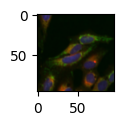

BR00117010


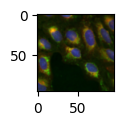

BR00117011


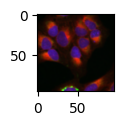

BR00117011


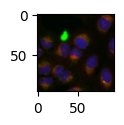

BR00117011


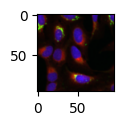

BR00117012


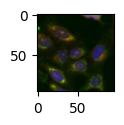

1-octanol
BR00117013


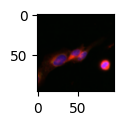

BR00117012


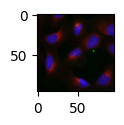

BR00117010


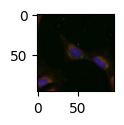

BR00117012


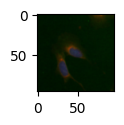

BR00117013


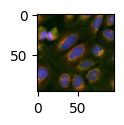

BR00117013


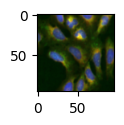

2,5-furandimethanol
BR00117011


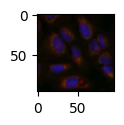

BR00117013


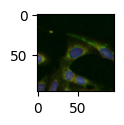

BR00117012


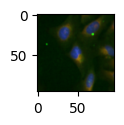

BR00117013


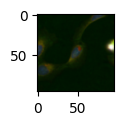

BR00117010


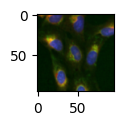

BR00117013


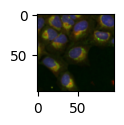

2-Oleoylglycerol
BR00117010


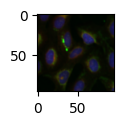

BR00117013


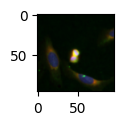

BR00117012


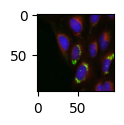

BR00117013


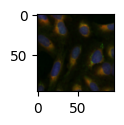

BR00117013


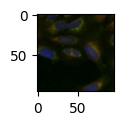

BR00117010


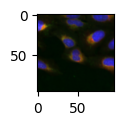

4-CMTB
BR00117010


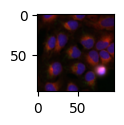

BR00117010


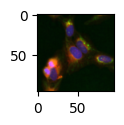

BR00117012


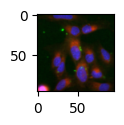

BR00117013


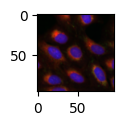

BR00117011


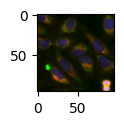

BR00117013


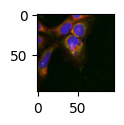

4-methylhistamine
BR00117013


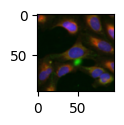

BR00117011


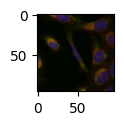

BR00117010


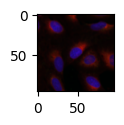

BR00117013


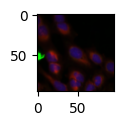

BR00117010


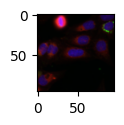

BR00117011


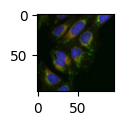

7-hydroxystaurosporine
BR00117013


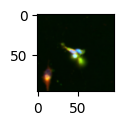

BR00117013


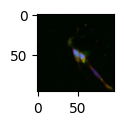

BR00117011


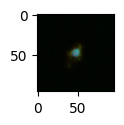

BR00117012


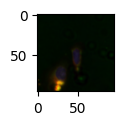

BR00117013


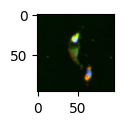

BR00117013


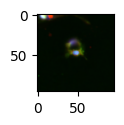

A-987306
BR00117013


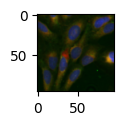

BR00117012


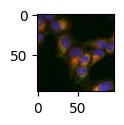

BR00117011


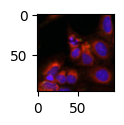

BR00117013


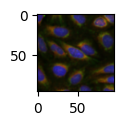

BR00117013


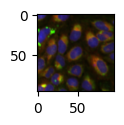

BR00117011


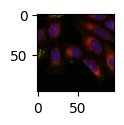

A205804
BR00117011


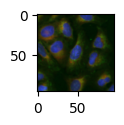

BR00117011


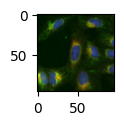

BR00117010


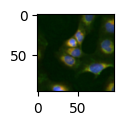

BR00117013


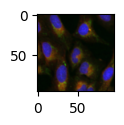

BR00117011


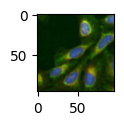

BR00117013


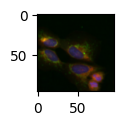

ABL1
BR00116998


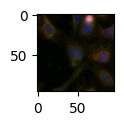

BR00116996


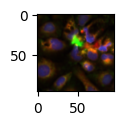

BR00116996


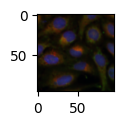

BR00116997


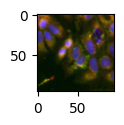

BR00116998


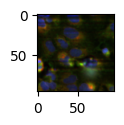

BR00116999


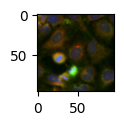

AC-710
BR00117013


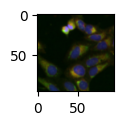

BR00117012


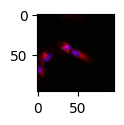

BR00117011


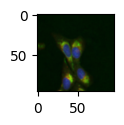

BR00117010


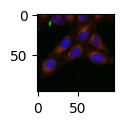

BR00117012


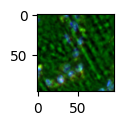

BR00117013


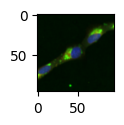

ADA
BR00116998


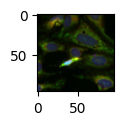

BR00116998


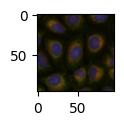

BR00116998


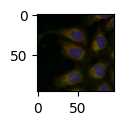

BR00116998


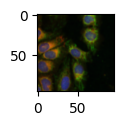

BR00116999


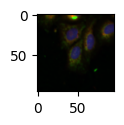

BR00116998


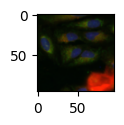

ADH1C
BR00118040


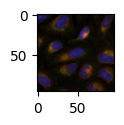

BR00118040


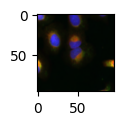

BR00116997


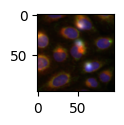

BR00118039


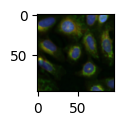

BR00118040


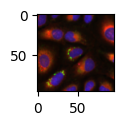

BR00116999


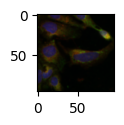

ADORA2A
BR00118040


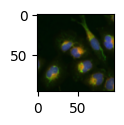

BR00116997


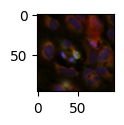

BR00118039


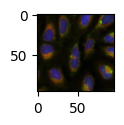

BR00116998


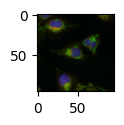

BR00116997


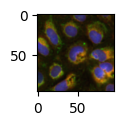

BR00116998


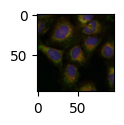

ADRA2B
BR00116997


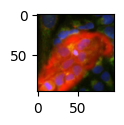

BR00116998


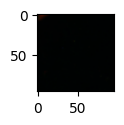

BR00116996


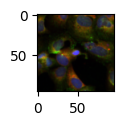

BR00118039


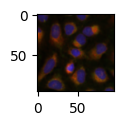

BR00116997


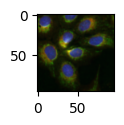

BR00116996


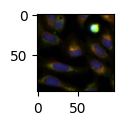

AGER
BR00118040


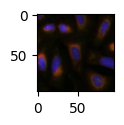

BR00116997


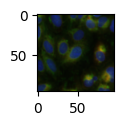

BR00116996


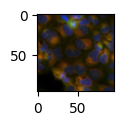

BR00116996


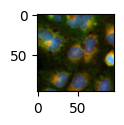

BR00116996


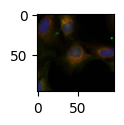

BR00118039


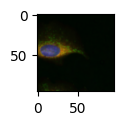

AK-7
BR00117011


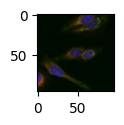

BR00117011


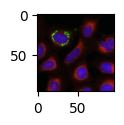

BR00117011


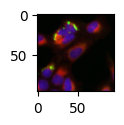

BR00117013


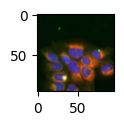

BR00117013


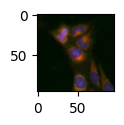

BR00117011


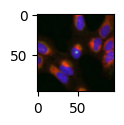

AKR1B1
BR00116998


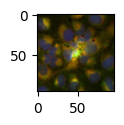

BR00116997


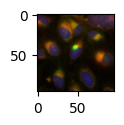

BR00116996


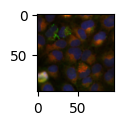

BR00118039


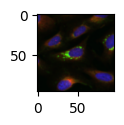

BR00118040


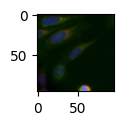

BR00116999


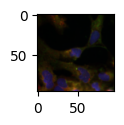

AKR1C1
BR00116998


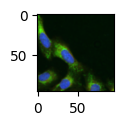

BR00118039


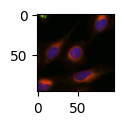

BR00116997


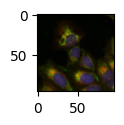

BR00116997


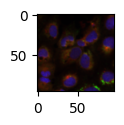

BR00116997


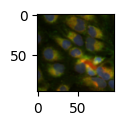

BR00116999


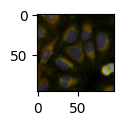

AKT1
BR00116999


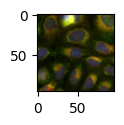

BR00118040


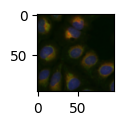

BR00116998


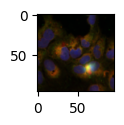

BR00116999


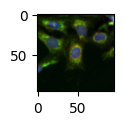

BR00116998


KeyboardInterrupt: 

In [64]:
show_images_by_groups(image_folder, metadata_cpg0000_trt, "CPD_NAME", 5)

In [63]:
image_folder

PosixPath('/lustre/groups/ml01/datasets/projects/cpg0000_alessandro/cpg0000_u2os_normalized_segmented_large')

In [67]:
np.unique(metadata_cpg0000.PLATE)

array(['BR00116996', 'BR00116997', 'BR00116998', 'BR00116999',
       'BR00117010', 'BR00117011', 'BR00117012', 'BR00117013',
       'BR00118039', 'BR00118040'], dtype=object)

In [68]:
metadata_cpg0000_trt

,SAMPLE_KEY,PLATE,WELL,PERT_TYPE,CPD_NAME,STATE,ANNOT,GENE,SEQUENCE,SPLIT
1,BR00116999_L03_6_93,BR00116999,L03,CRISPR,HTR2C,trt,CRISPR,HTR2C,GTTACTGCACGGCCACACCG,test
2,BR00116997_C07_7_109,BR00116997,C07,CRISPR,CYP2A6,trt,CRISPR,CYP2A6,GTTTCCAATGAAGGGCAATG,train
3,BR00116998_O24_1_69,BR00116998,O24,CRISPR,ADA,trt,CRISPR,ADA,CACAGACTGGTCCCCCAAGG,test
4,BR00117011_A19_8_13,BR00117011,A19,Compound,flupirtine,trt,Compound,KCNQ2,CCOC(=O)Nc1ccc(NCc2ccc(F)cc2)nc1N,test
5,BR00118039_O19_1_36,BR00118039,O19,ORF,PDE3A,trt,ORF,PDE3A,atggcagtgcccggcgacgctgcacgagtcagggacaagcccgtcc...,train
...,...,...,...,...,...,...,...,...,...,...
435152,BR00116996_O02_5_90,BR00116996,O02,CRISPR,HTR3A,trt,CRISPR,HTR3A,AATGACGTCAATGGATACGG,train
435154,BR00116999_P22_4_178,BR00116999,P22,CRISPR,OPRM1,trt,CRISPR,OPRM1,AATGTATCGATCAACACTCA,train
435155,BR00118040_E05_6_24,BR00118040,E05,ORF,GLRA3,trt,ORF,GLRA3,atggcccacgtgagacactttcggacattagtttcgggattttact...,train
435159,BR00116996_N03_2_90,BR00116996,N03,CRISPR,PPARD,trt,CRISPR,PPARD,GCACCACAGTGGAGACCGTG,train
